# Прогноз продаж компьютерных игр

## Описание проекта  

**Заказчик:** интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.  
**Исходные данные:** из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). 

**Задача:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

### Ход исследования  

Данные получение из датасета `games.scv`. О качестве данных ничего неизвестно. Перед проведением исследования понадобится обзор данных.  

После обзора данных подготовим данные к исследованию: приведем столбцы к единому стилю, преобразуем данные к нужным типам данных, обработаем пропуски, посчитаем суммарные продажи во всех регионах и выведем их в отдельный столбец.  
Далее проведем исследовательский анализ данных, составим портреты пользователей каждого региона (по популярным платформам, жанрам, рейтингу ESRB).  

Конечным этапом будет подведение итогов исследование и написание общего вывода.

Таким образом, исследование пройдет в 6 этапов:
1. Изучение общей информации
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

### Описание данных  

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## Изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from math import sqrt
from scipy import stats as st
from scipy.stats import binom, poisson, norm

import warnings

In [2]:
# считывание csv-файла
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

In [3]:
# увеличим максимальное количество отображающихся столбцов
pd.set_option('display.max_columns', None)

sns.set(color_codes=True)

# отключим предупреждения
warnings.filterwarnings('ignore')

In [4]:
# выведем первые 5 строк датафрейма
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# выведем общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# выведем общую информацию о количественных данных в таблице
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**  
Таблица содержит почти 17 тысяч значений, состоит из 11 столбцов. Некоторые столбцы имеют пропуски, типы данных некоторых столбцов не соответствуют самим данным. Перейдем к предобработке данных.

## Предобработка данных

### Приведем названия столбцов к нижнему регистру (в соответствии с "хорошим стилем")

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Анализ каждого столбца

Предобработку данных будем проводить последовательно, анализируя каждый столбец, но сначала выведем долю пропусков всех столбцов, данная информация пригодится нам в дальнейшем

In [8]:
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
critic_score,51.300000
rating,40.500000
user_score,40.100000
year_of_release,1.600000
name,0.000000
genre,0.000000
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Большой процент пропусков в оценках пользователей и критиков, а также в возрастном рейтинге. Скорее всего, данные пропуски возникли из-за потери данных, либо из-за незаполнения данных полей. Тоже касается и года выпуска игры.

In [9]:
def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков в датафрейме' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

(0.0, 100.0)

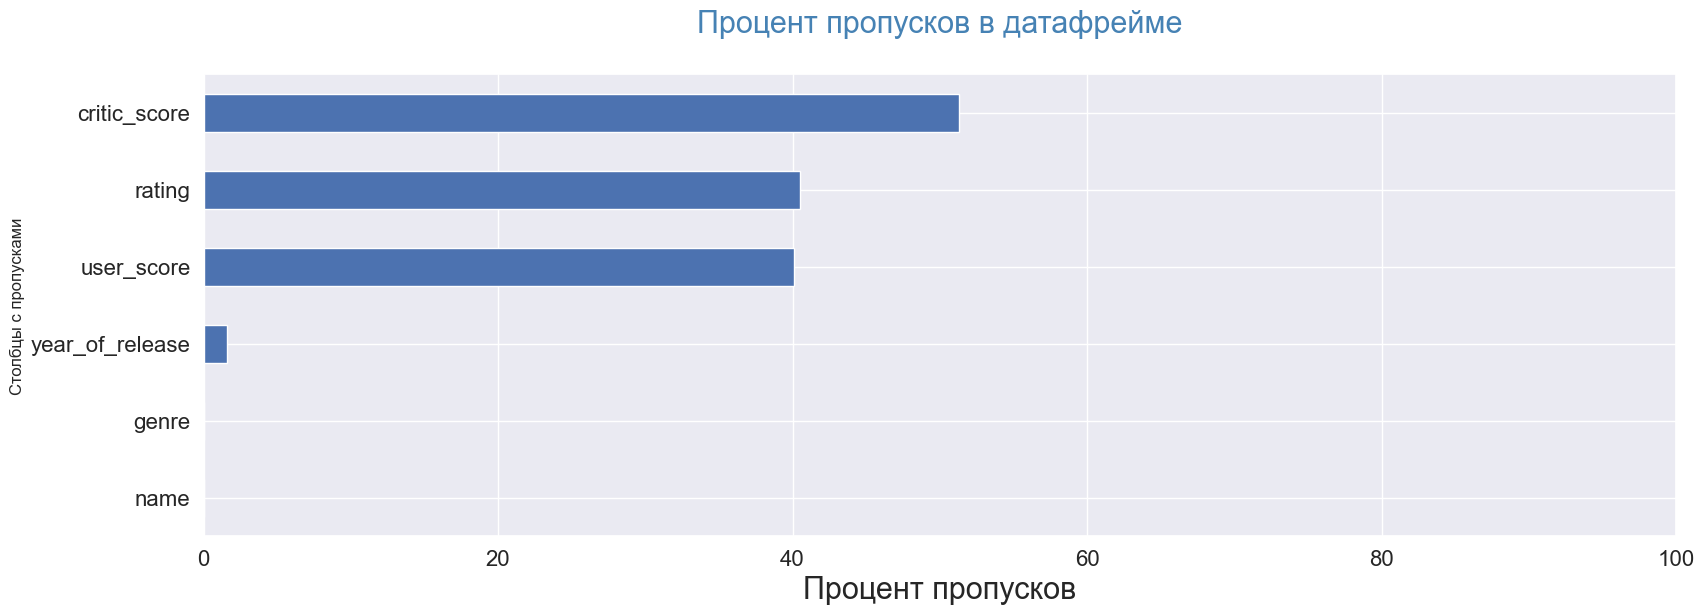

In [10]:
pass_value_barh(df)
plt.xlabel('Процент пропусков', fontsize=22)
plt.ylabel('Столбцы с пропусками')
plt.xlim(0,100)

#### `name`

Хотя доля пропусков данного столбца составляет 0%, на этапе обзора данных всей таблицы мы увидели, что в данном столбце имеется два пропуска. Отобразим их.

In [11]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Т.к. помимо имен в данных значениях также пропущены остальные данные, такие как жанр, рейтинг, оценка критиков и пользователей, то удалим эти 2 значения.

In [12]:
df = df.dropna(subset=['name'])
df = df.reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df['name'].value_counts()

Need for Speed: Most Wanted                      12
Ratatouille                                       9
LEGO Marvel Super Heroes                          9
FIFA 14                                           9
Madden NFL 07                                     9
                                                 ..
Exhibition Volume 4                               1
Hyperdimension Neptunia Re;Birth 2                1
Cranium Kabookii                                  1
Naruto Shippuden: Clash of Ninja Revolution 3     1
The Adventures of Cookie & Cream                  1
Name: name, Length: 11559, dtype: int64

Имеются значения с одинаковыми названиями имен. Проверим, нет ли дубликатов в названиях игр для разных платформ, выпущенный в один и тот же год.

In [14]:
df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16228,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим дубликат

In [15]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

Выведем игры, в которых название повторяется в рамках одной платформы

In [16]:
df[df.groupby(df.name + df.platform)['name'].transform('count') > 1].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11714,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4126,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


С Need for Speed: Most Wanted все впорядке - у данной игры было переиздание в 2012 году. А вот Sonic the Hedgehog - непонятно, год издания в повторном значении отсутствует. Показатели продаж разные, возможно тоже переиздание. Пока что оставим данное значение.

#### `year_of_release`

На этапе обзора данных выяснили, что у данного столбца некорректный тип данных. Для того, чтобы изменить тип данных в столбце `year_of_release` сначала удалим пропуски в данном столбце, т.к. уже известно, что их доля составляет всего 1,6%

In [17]:
df = df.dropna(subset=['year_of_release'])

Приведем столбец `year_of_release` таблицы в  целочисленный формат и проверим за какой период предоставлены данные.

Год выпуска первой игры: 1980
Год выпуска последней игры: 2016


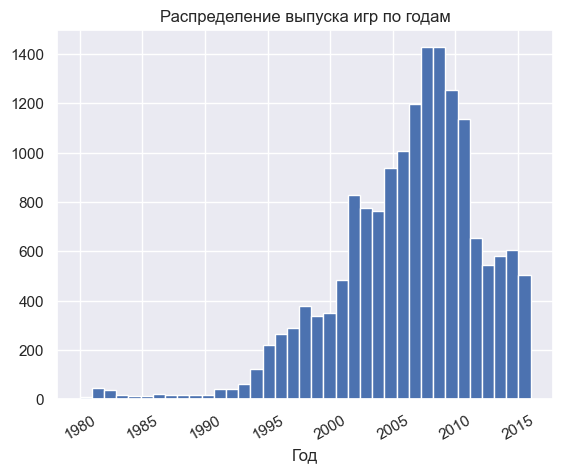

In [18]:
# приведем столбец `year_of_release` к типу данных дата
df['year_of_release'] = df['year_of_release'].astype('int')

# Выведем первую и последнюю годы выпуска игр
print('Год выпуска первой игры:', df['year_of_release'].min())
print('Год выпуска последней игры:', df['year_of_release'].max())

# Построим гистрограмму распределения выска игр по годам
plt.hist(df['year_of_release'], bins=37)
plt.grid(True) # включим отображение сетки
plt.xticks(rotation=30) # повернем название дат для корректного отображения
plt.xlabel('Год') # подпишем ось Х
plt.title('Распределение выпуска игр по годам') # дадим название гистограмме
plt.show()

В таблице представлены игры, выпускаемые с 1980 по 2016 года. Больше всего игр выпущено с 2007 по 2011 года. 

#### `platform`

Пропуски в данном столбце отсутствуют, проверим корректность данных и выведем все имеющиеся платформы

Text(0, 0.5, 'Платформа')

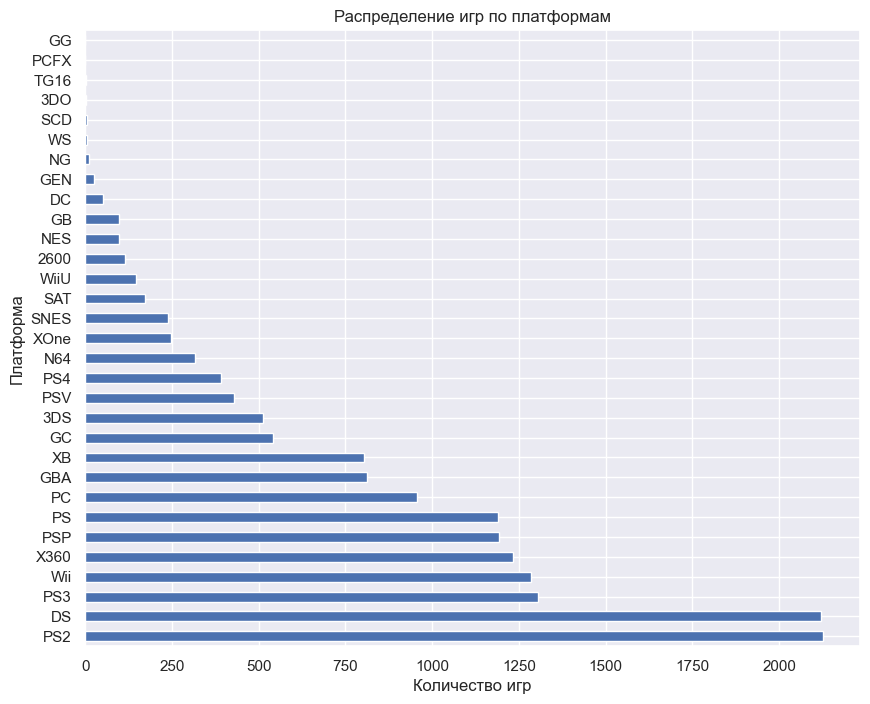

In [19]:
# Построим столбчатую диаграмму
df['platform'].\
value_counts().\
plot(kind='barh',
     figsize=(10, 8),
     grid=True,
     title='Распределение игр по платформам')

plt.xlabel('Количество игр')
plt.ylabel('Платформа')

Больше всего игр представлено на платформах DS и PS2.

#### `genre`

Пропуски в данном столбце также отсутствуют, проверим корректность данных и выведем все имеющиеся платформы

<AxesSubplot:title={'center':'Распределение игр по жанрам'}, ylabel='Жанр'>

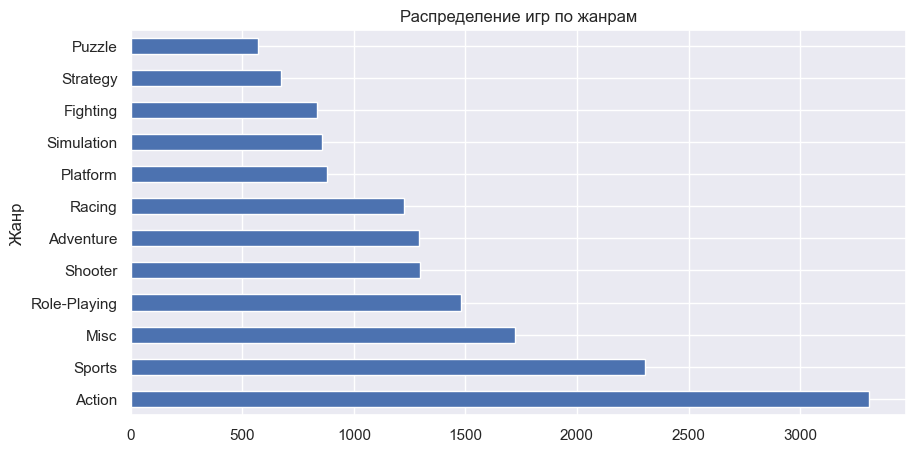

In [20]:
# Построим столбчатую диаграмму
df['genre'].\
value_counts().\
plot(kind='barh',
     figsize=(10, 5),
     grid=True,
     xlabel='Жанр',
     ylabel='Количество игр',
     title='Распределение игр по жанрам')

Больше всего представлено игр-экшенов, меньше всего паззлов.

#### `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

Как выяснили из пункта 2.2 - доля пропусков в этих столбцах 0%, с типом данных тоже все впорядке, поэтому выведем только описание каждого из них.

In [21]:
df['na_sales'].describe()

count    16443.000000
mean         0.264028
std          0.818400
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [22]:
df['eu_sales'].describe()

count    16443.000000
mean         0.145939
std          0.506731
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [23]:
df['jp_sales'].describe()

count    16443.000000
mean         0.078492
std          0.311109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [24]:
df['other_sales'].describe()

count    16443.000000
mean         0.047597
std          0.188011
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

#### `user_score`, `critic_score`

Текущий формат столбца `user_score` - object. Выглядит странным, т.к. если бы данный столбец имел только числовые значение и NaN'ы, то формат должен быть float. Выведем все уникальные значения данного столбца

In [25]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [26]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце `user_score` присутствуют значения **'tbd'**.  
Согласно информации из открытых источников данная аббревиатура расшифровывается как To Be Determined (Будет определено) или To Be Decided (будет решено).

Ссылка на источник: https://mobilradio.ru/information/vocabulary/tbd.htm#:~:text=TBD%20%2D%20%D0%B0%D0%B1%D0%B1%D1%80%D0%B5%D0%B2%D0%B8%D0%B0%D1%82%D1%83%D1%80%D0%B0%20%D0%BE%D1%82%20%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%20To,%D0%BD%D0%B0%D0%B4%D0%BE%20%D0%B7%D0%B0%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D1%8C%2C%20%D0%B2%20%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%B8%20%D1%82%D1%80%D0%B5%D0%B1%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B9.  

Заменим значения **'tbd'** на NaN и приведем данный столбец к типу данных с плавающей запятой (float).

In [27]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN).astype('float')

In [28]:
# Выведем описание столбца
df['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [29]:
# Выведем описание столбца
df['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

В столбце `critic_score` более 50% пропусков, в столбце `user_score` пропусков около 40%. Т.к. пропусков очень много, то их заполнение каким-либо значением может сместить реальные оценки, поэтому заполним пропуски индикаторным значением (-1).

In [30]:
# заполним пропуски
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
# проверим текущее кол-во пропусков
print('Кол-во пропусков в столбце user_score - ', df['user_score'].isnull().sum())
print('Кол-во пропусков в столбце critic_score - ', df['critic_score'].isnull().sum())

Кол-во пропусков в столбце user_score -  0
Кол-во пропусков в столбце critic_score -  0


Оценим соотношение оценок критиков и пользователей без учета заполненных ранее индикаторных значений.

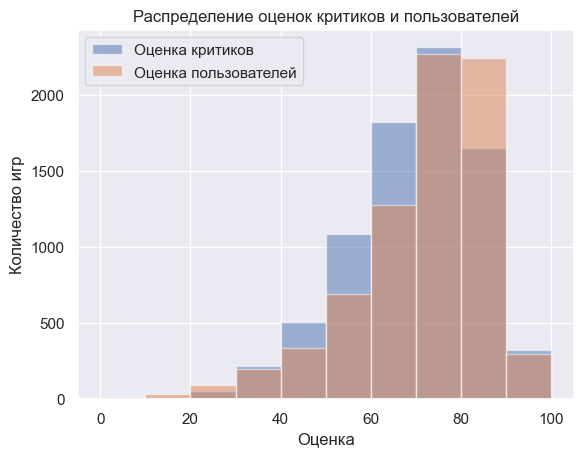

In [31]:
fig, ax = plt.subplots()
df.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5, range=(0,100))
(df.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5, range=(0,100))
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.alpha=0.5
plt.show()

Тенденции в оценках критиков и пользователей по большей части одинаковые.

#### `rating`

In [32]:
# Выведем все рейтинги
df['rating'].value_counts() 

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Для начала найдем описание рейтинга ESRB
(https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

Расшифруем обозначения рейтинга:

`EC` — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

`E` — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально `K-A` ("Kids to Adults");

`E10+` — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

`T` — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

`M` — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

`AO` — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

`RP` — Rating Pending Рейтинг ожидается.

Изучив описание, смело можем заменить категорию `K-A` на `E`. Категорию `EC` тоже можем заменить на `E`, т.к. в этой категории всего 8 значений.

In [33]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'EC', 'rating'] = 'E'

In [34]:
# Посчитаем кол-во пропусков
df['rating'].isna().sum()

6676

В п.2.2.1 увидели, что встречается большое кол-во игр с одинаковым названием, но на разных платформах. По сути это одни и те же игры, с одинаковым возрастным рейтингом. Заполним часть пропусков в тех позициях, где в играх с одним и тем же названием имеется незаполненный возрастной рейтинг.

In [35]:
# Создаем словарь
rating_name = df.set_index("name")['rating'].dropna().to_dict()

def fill_rating(st):
    '''
    Заполняет возрастной рейтинг, 
    если встречается такое же название игры
    '''
    if pd.isna(st['rating']):
        return rating_name.get(st['name'])
    return st['rating']

df['rating'] = df.apply(fill_rating, axis=1)

In [36]:
# Повторно посчитаем кол-во пропусков
df['rating'].isna().sum()

6259

Удалось избавиться от 300 значений пропусков, уже неплохо. Построим график распределения рейтинга в зависимости от года выпуска игры

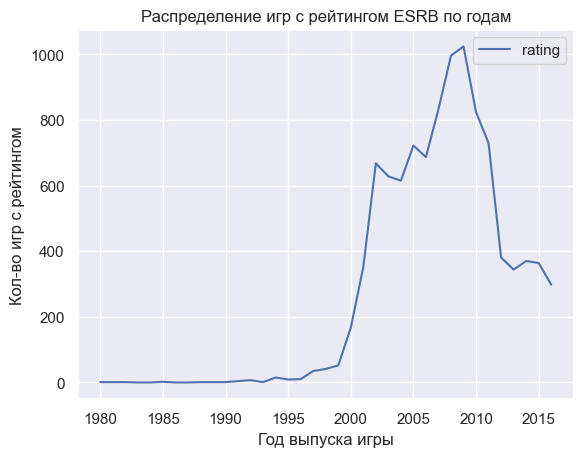

In [37]:
plots = df.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('Год выпуска игры')
plt.ylabel('Кол-во игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

Видим, что рейтинг начал появлять ближе к 1995 года, видимо до этого времени игры не оценивали. Удалять пропуски не будем - заполним их значением `unrated` - без рейтинга.

In [38]:
df['rating'] = df['rating'].fillna('unrated')

### Суммарные продажи во всех регионах

Добавим к нашей таблице столбец `total_sales`, в который поместим сумму значений по столбцам `na_sales`, `eu_sales`, `jp_sales` и `other_sales`

In [39]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unrated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unrated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unrated,28.31


Выведем сравнительные показатели всех продаж

In [40]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597,0.536055
std,0.818400,0.506731,0.311109,0.188011,1.558828
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,0.470000
max,41.360000,28.960000,10.220000,10.570000,82.540000


Построим столбчатую диаграмму продаж по регионам в зависимости от года выпуска игры. Полная высота одного столбца как раз будет иметь значение, посчитанное в `total_sales`

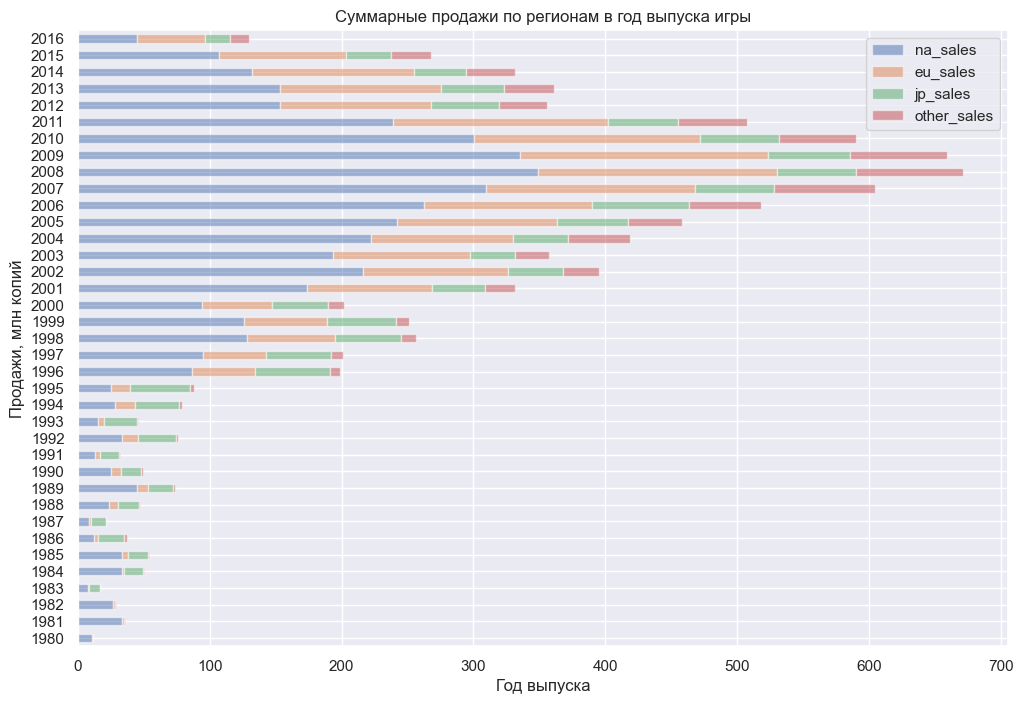

In [41]:
fig, ax = plt.subplots()

(df
 .groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('sum')
 .plot(kind='barh',stacked=True, ax=ax, figsize=(12,8), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в год выпуска игры')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

Больше всего продаж во все года - в Северной Америке, меньше в Европе. Продажи в Японии и остальных странах примерно одинаковые после 2004 года.  
До 1995 года данные по продажам в других странах отсутствуют.

In [42]:
# Проверим на всякий случай дубликаты
df.duplicated().sum()

0

Дубликаты отсутствуют.

**Вывод**  
В ходе предобработки данных привели столбцы `year_of_release` и `user_score` в необходимому типу данных. Избавились от пропусков, там где это возможно, проверили дубликаты названий игр.  
Также добавили в исходный датафрейм столбец с суммой продаж по всем регионам и оценили продажи в каждом регионам по годам выпуска игр. Переходим к исследовательскому анализу данных.

In [43]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Количество игр выпускаемое в разные года

Гистограмма распределения игр по года представлена в п.2.2.2. Проведем более подробный анализ: узнаем кол-во выпускаемых по годам игр на различных платформах.

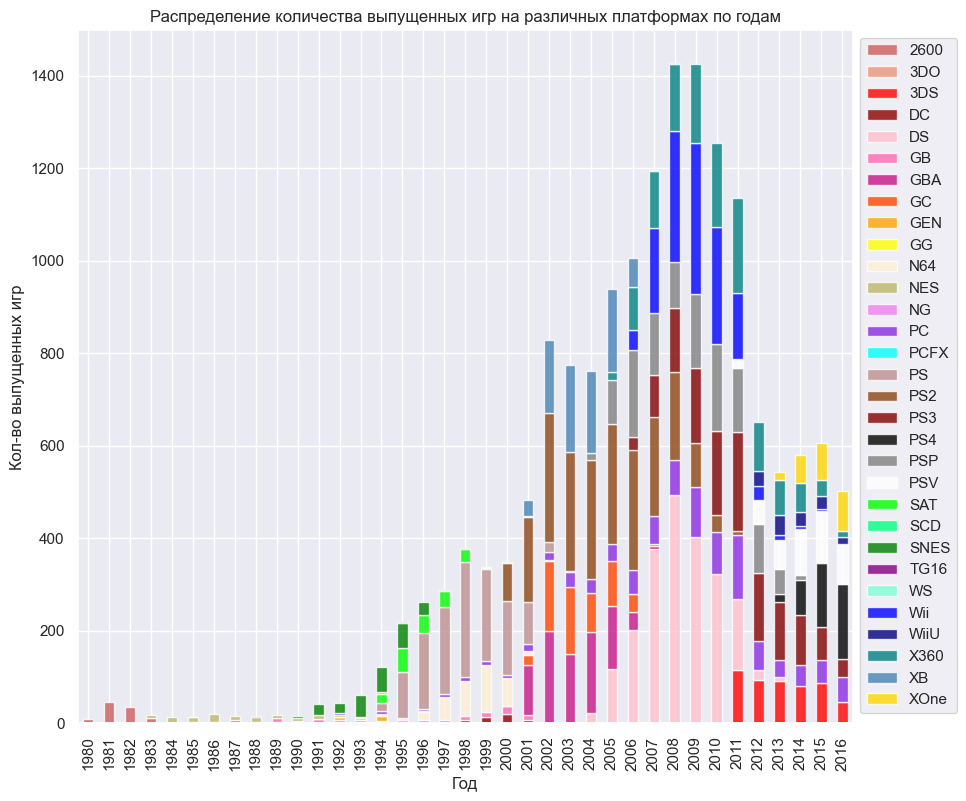

In [44]:
# Построим столбчатую диаграмму распределения выпуска игр на разных платформах по годам
fig, ax = plt.subplots(figsize=(20, 15))

color = ['IndianRed', 'DarkSalmon', 'Red', 'DarkRed', 'Pink',\
        'HotPink', 'MediumVioletRed', 'OrangeRed', 'Orange', 'Yellow',\
         'PapayaWhip', 'DarkKhaki', 'Violet', 'BlueViolet', 'Aqua',\
         'RosyBrown', 'SaddleBrown', 'Maroon', 'Black', 'Gray',\
         'White', 'Lime', 'SpringGreen', 'Green', 'Purple',\
         'Aquamarine', 'Blue', 'Navy', 'Teal', 'SteelBlue',\
         'Gold'
        ]
df.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',color=color, stacked=True, ax=ax, figsize=(10,9), alpha=0.8)

#color=np.random.rand (31,3)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Год')
ax.set_ylabel('Кол-во выпущенных игр')
ax.set_title('Распределение количества выпущенных игр на различных платформах по годам')

plt.show()

* До 1995 года выпускалось довольно мало игр, при анализе данный период можно не учитывать.  
* Наибольшее кол-во игр выпускалось с 2002 по 2011 года. Самые популярные платформы в этот период были от Sony: PS2, PS3, PSP 
* Видно, что с течением времени некоторые платформы перестают быть популярными и уходят с рынка, их заменяют новые платформы

### Продажи по платформам

Сгруппируем платформы по суммарным продажам и выведем платформы начиная с самой продаваемой

In [45]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Распределение продаж по годам будем строить у платформ с суммарными продажами более 250млн.проданных копий, это первые 14 платформ из полученного списка.

In [46]:
top_platform_sales = platform_sales[platform_sales['total_sales'] > 250]

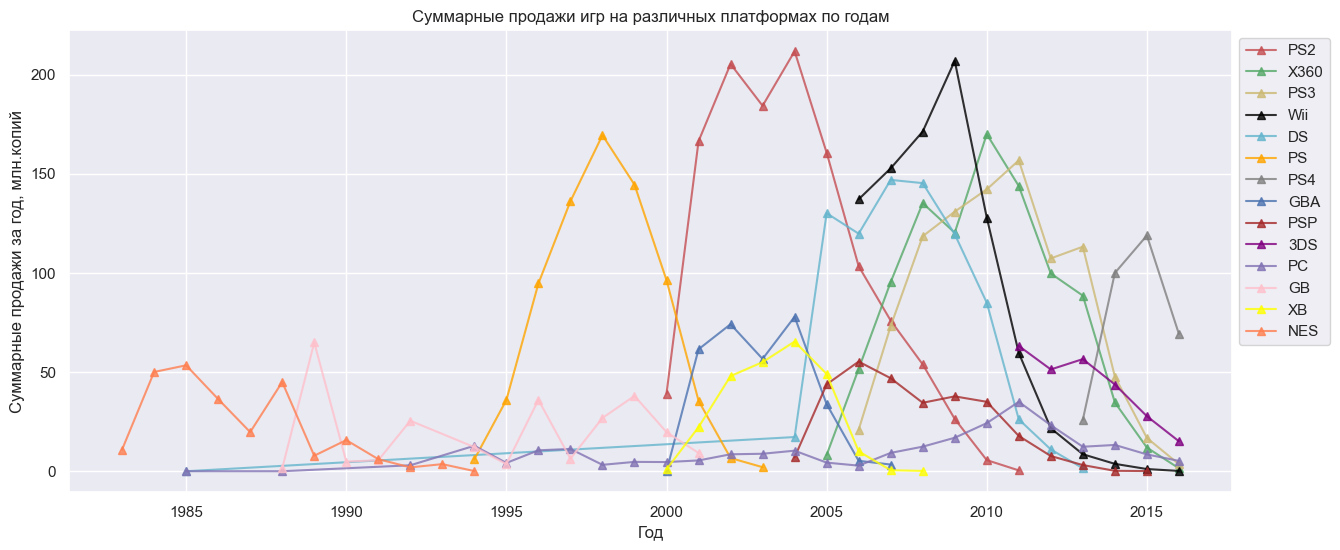

In [47]:
# построим список цветов для графика
color = ['r','g','y','black','c','orange','grey','b','brown','purple','m','pink','yellow','coral','darkcyan','dimgray','lime']
# построим график
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.title('Суммарные продажи игр на различных платформах по годам')

for i in range(0,len(top_platform_sales)):
    # извлечем и запишем строки с топовыми платформами,
    # сгруппируем их по году выпуска и суммарному объему продаж
    platform  = df.query('platform == @top_platform_sales["platform"][@i]').\
    groupby('year_of_release')['total_sales'].sum()
    # построим линию продаж платформы по годам
    platform.plot(x=platform.index, 
                  y=platform.values, 
                  style='-^', color=color[i],
                  label=top_platform_sales["platform"][i],
                  alpha=0.8,
                  grid=True);
plt.xlabel('Год')    
plt.ylabel('Суммарные продажи за год, млн.копий')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show();

Видим странный выброс на платформе `DS` 1985 года. Уточним из открытых источников, когда была выпущена данная платформа (https://ru.wikipedia.org/wiki/Nintendo_DS)

Платформа `DS` выпущена в 2004 году, следовательно значения 1985 года для нее является выбросом, найдем данное значение.

In [48]:
df.query('platform == "DS" and (year_of_release == 1985)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unrated,0.02


Данная игра - переиздание японских шахмат "Shogi" с платформы NES на DS 2005 года. Приведем год выпуска игры в порядок.

In [49]:
df.loc[15957, 'year_of_release'] = 2005

<AxesSubplot:xlabel='year_of_release'>

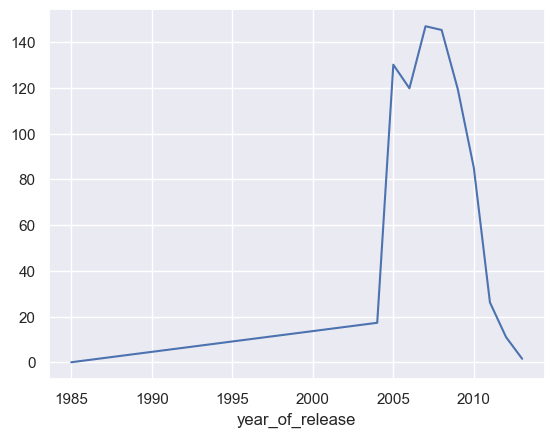

In [50]:
# проверим распределение платформы DS по годам и продажам
df.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot()

Аномалия устранена.

Для определения среднего срока жизни платформы при анализе не будем учитывать платформы, срок жизни которых не завершен (это платформы `PS4` и `3DS`), а также исключим `PC`, т.к. это не игровая платформа.

In [51]:
df_actual_platform = df.query('platform != "PS4" and (platform != "PC") and (platform != "3DS")')

Определим жизненный срок платформы, чтобы не учитывать в актуальных платформах - платформы однодневки, а также уберем явный выброс - платформу `DS`.

In [52]:
# жизненный срок платформы
years_of_life = df_actual_platform.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])
years_of_life.columns = ['min','max']
years_of_life['years_of_life'] = years_of_life['max'] - years_of_life['min']
years_of_life = years_of_life.sort_values(by = 'years_of_life', ascending = False)

In [53]:
# Уберем платформы, срок жизни которых составляет 1-2 года
years_of_life = years_of_life[(years_of_life['years_of_life'] > 2) & (years_of_life['years_of_life'] < 15)]
years_of_life

,min,max,years_of_life
platform,,,
GB,1988,2001,13
PS2,2000,2011,11
X360,2005,2016,11
PSP,2004,2015,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10
PS3,2006,2016,10
PS,1994,2003,9


count    21.000000
mean      7.857143
std       3.037856
min       3.000000
25%       5.000000
50%       9.000000
75%      10.000000
max      13.000000
Name: years_of_life, dtype: float64

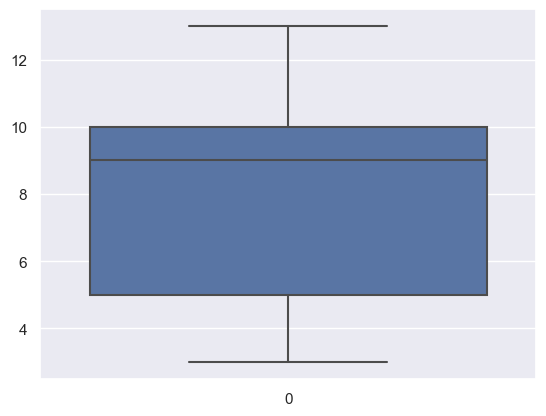

In [54]:
# построим ящик с усами для продолжительности жизни платформ и выведем описание
_ = sns.boxplot(data=years_of_life['years_of_life'])

years_of_life['years_of_life'].describe()

В большинстве случаев график объема продаж игр по платформам в различные года представляет собой нормальное распределение.  
Средний расчетный срок жизни платформы получился около 8 лет.

### Выбор потенциально выгодных платформ за актуальный период

Согласно графику, построенному в п.3.2 видно, что в период 2013-2016 годах цикл жизни всех платформ, кроме PS4 подходит к завершающей стадии. Соответственно в прогнозе на 2017 год необходимо больше внимания уделить именно платформе PS4, т.к. вклад остальных платформ будет незначительным. Выберем за актуальный период данные за последние 3 года (2014-2016).

In [55]:
# построим сводную таблицу
actual = df.pivot_table(index='year_of_release', 
                              columns='platform', 
                              values='total_sales', 
                              aggfunc='sum').\
    query('year_of_release >= 2014').fillna(0).reset_index()

# Удалим платформы, если их продажи в указанные года равны 0
for column in actual.columns:
    if actual[column].sum() == 0:
        actual.drop(column, axis=1,inplace=True)

display(actual)

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


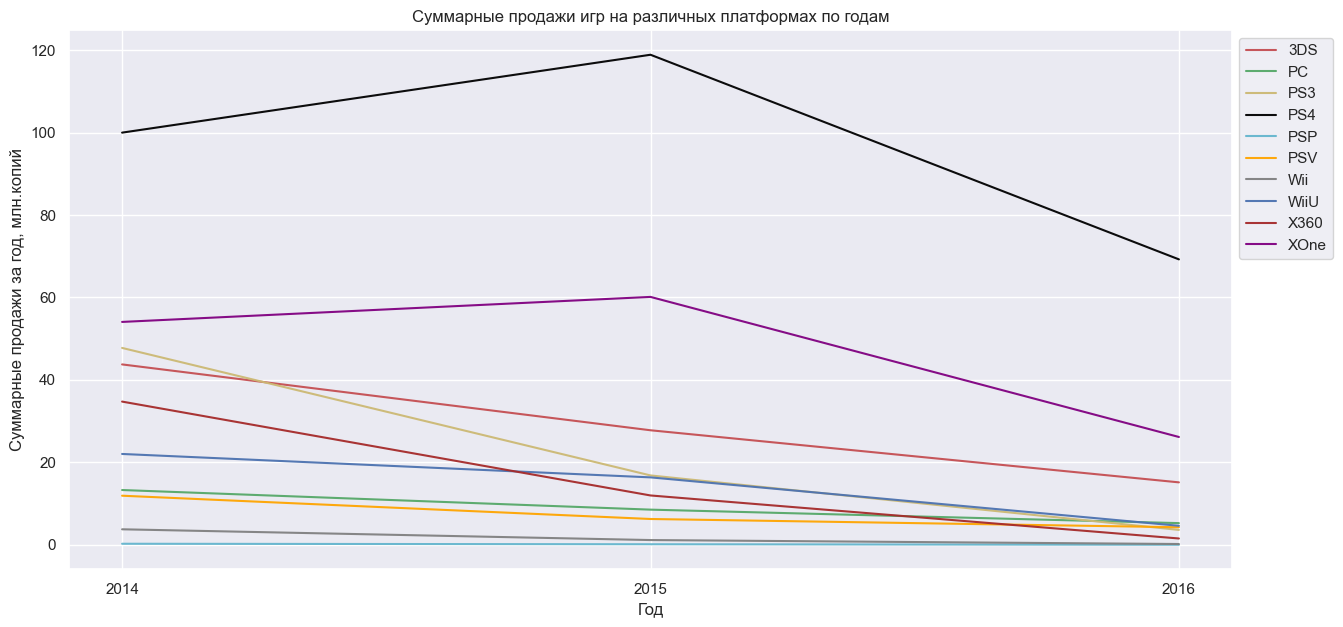

In [56]:
# Построим график продаж с 2014 по 2016 гг.
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Суммарные продажи игр на различных платформах по годам')

i = 0
for column in actual.columns[1:]:
    plt.plot(actual['year_of_release'].to_list(), actual[column].to_list(), label=column, color=color[i], alpha=0.95);
    i += 1

plt.grid()
plt.xlabel('Год')    
plt.ylabel('Суммарные продажи за год, млн.копий')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(np.arange(2014, 2017, 1))
plt.show();

Как и было сказано ранее, цикл жизни многих платформ подходит к завершающей стадии.

В последние 3 года лучше всего продаются игры на PS4, т.к. это самая новая платформа, при этом относительно неплохо продаются игры для  XOne и 3DS.  

Стоит заметить, что даже у всех платформ (даже самой продаваемой PS4) продажи падают. Возможно это связано с тем, что данные за 2016 год неполные, т.к. в период 2014-2015 продажи новых платформ PS4 и XOne росли.

In [57]:
# Cформируем актуальный датафрейм
actual_data = df.query('year_of_release >= 2014')

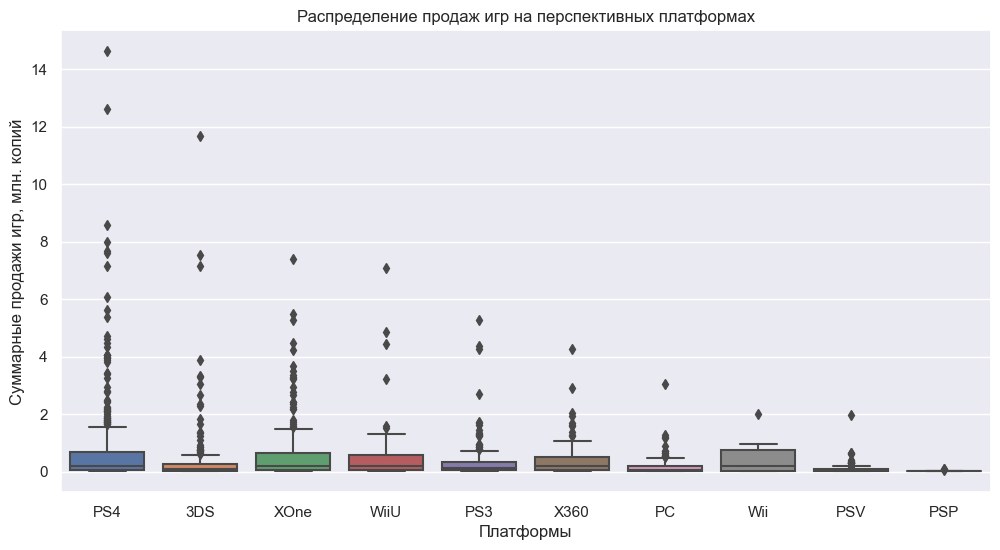

In [58]:
# Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам
# в 100% масштабе
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='platform', y='total_sales', data=actual_data)
ax.set_ylabel('Суммарные продажи игр, млн. копий')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр на перспективных платформах')
plt.show()

Максимальные продажи в последние года у платформ PS4 (более 14млн.копий) и 3DS (около 12 млн.копий). 

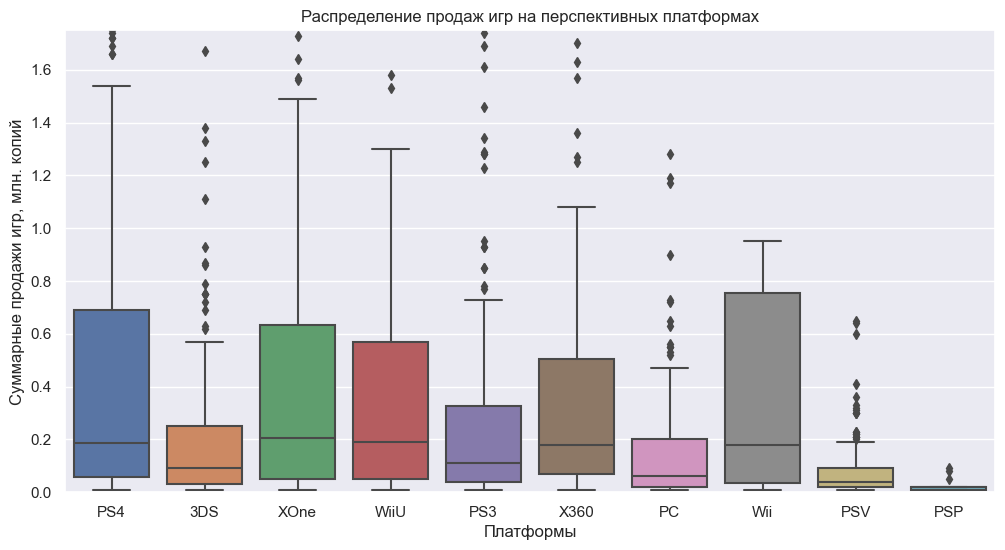

In [59]:
# Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам
# в приближенном масштабе
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='platform', y='total_sales', data=actual_data)
ax.set_ylim(0, 1.75)
ax.set_ylabel('Суммарные продажи игр, млн. копий')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр на перспективных платформах')
plt.show()

Сразу у 5-ти платформ практически одинаковое медианное значение суммарных продаж ~0.2млн. копий, это платформы PS4, XOne, WiiU, X360, Wii

Сформируем сводную таблицу топ-5 платформ лидеров по продажам игр за 2014-2016гг.

In [60]:
actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales').head(5)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Мы выделили самые продаваемые платформы за последние года, но среди них оказались платформы `PS3` и `X360`, которым на момент 2016 года уже испольнилось 11 лет. Срок жизни данных платформ подходит к концу, поэтому не стоит учитывать их в прогнозе продаж на 2017 год, а акцентировать внимание только на `PS4`, `XOne`, `3DS`.

### Влияние отзывов критиков и пользователей на продажи игр на PS4

Влияние отзывов критиков и пользователей на продажи игр будем рассматривать в рамках самой продаваемой за последние 4 года платформы - PS4. Выделим данные с данной платформой, посчитаем коэф-т корреляции и построим корреляционную диаграмму.

In [61]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unrated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unrated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unrated,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unrated,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unrated,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unrated,0.01


In [62]:
# Создадим два отдельных среза, 
# в одном из них не будем рассматривать строки, где отсутствуют оценки пользователей
ps4_critic = actual_data.query('platform == "PS4" and (critic_score != -1)')
# в другом не будем рассматривать строки, где отсутствуют оценки критиков
ps4_user = actual_data.query('platform == "PS4" and (user_score != -1)')

Мы не рассматривали строки, где отсутствуют значения оценки пользователей, т.к. согласно обзору данных в п.2.2 пропусков значений в оценках критиков гораздо больше.

In [63]:
ps4_critic[['platform', 'critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


In [64]:
ps4_user[['platform', 'user_score', 'total_sales']].query('user_score != -1').corr()

,user_score,total_sales
user_score,1.000000,-0.040132
total_sales,-0.040132,1.000000


Как видим коэф-т корреляции продаж от отзывов критиков - положительный и равен 0.4; корреляции продаж от отзывов пользователей - практически нулевой и равен -0.04. Построим диаграммы корреляций

Text(0, 0.5, 'Суммарные продажи, млн. копий')

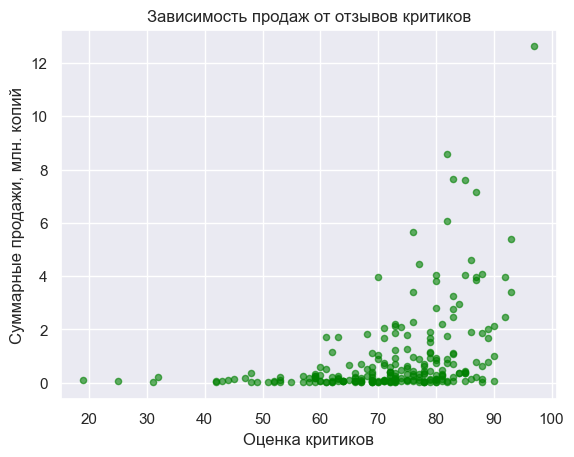

In [65]:
ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6, color='green')
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи, млн. копий')

(0.0, 10.0)

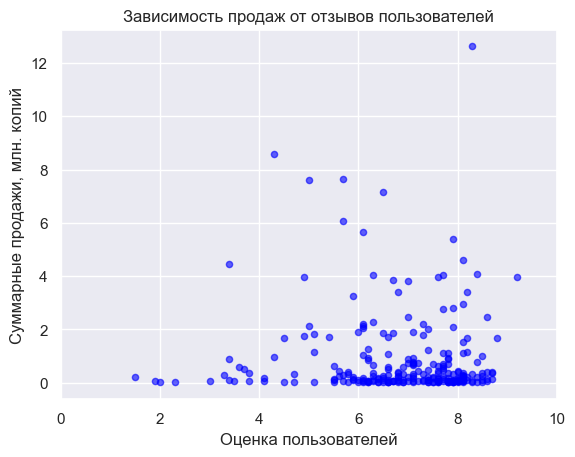

In [66]:
ps4_user.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6, color='blue')
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xlim(0,10)

Таким образом, можем сделать предварительный вывод, что отзывы пользователей на продажи никак не влияют, а вот отзывы критиков влияют напрямую.

### Влияние отзывов критиков и пользователей на продажи игр других платформ

Сравним выводы, полученные в п.3.4 для других платформ из топ-5: PS3, XOne, 3DS, X360.


PS3:
Коэффициент корреляции user_score и total_sales: 0.16
Коэффициент корреляции critic_score и total_sales: 0.45

XOne:
Коэффициент корреляции user_score и total_sales: 0.01
Коэффициент корреляции critic_score и total_sales: 0.43

3DS:
Коэффициент корреляции user_score и total_sales: 0.27
Коэффициент корреляции critic_score и total_sales: 0.31

X360:
Коэффициент корреляции user_score и total_sales: 0.34
Коэффициент корреляции critic_score и total_sales: 0.53


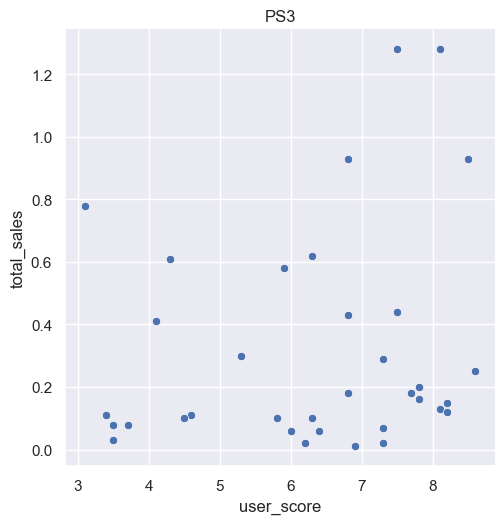

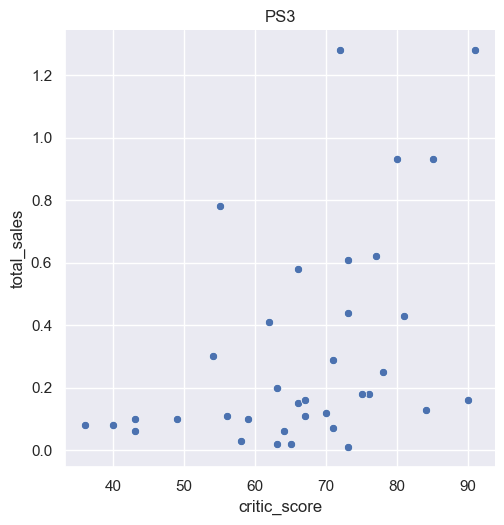

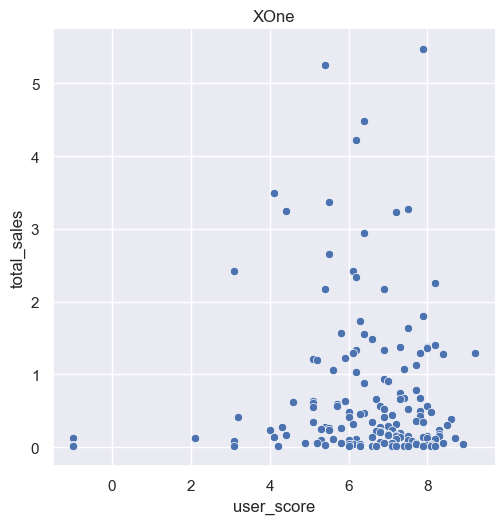

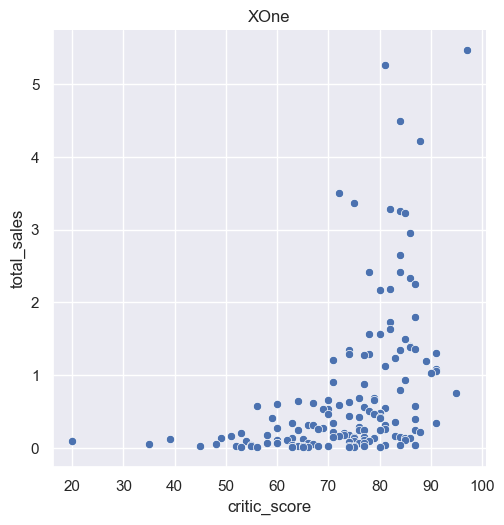

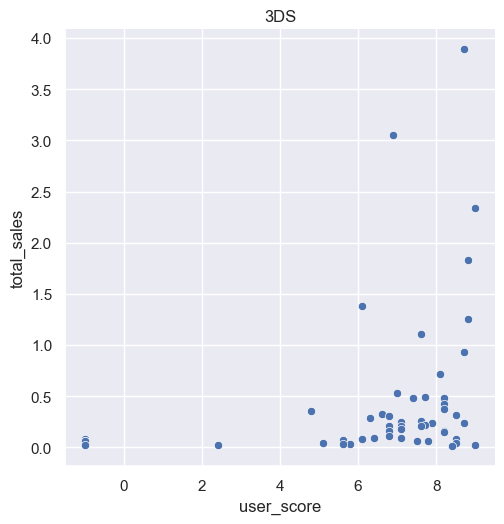

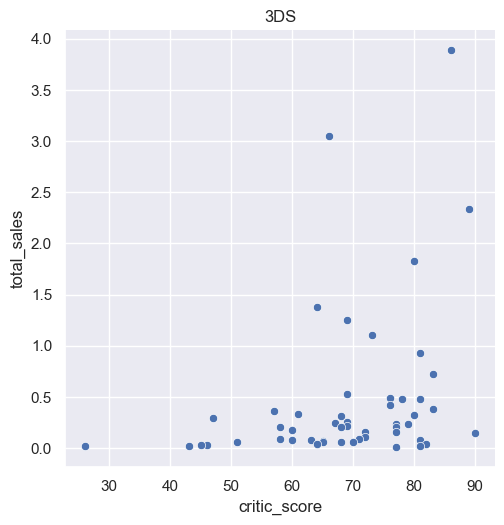

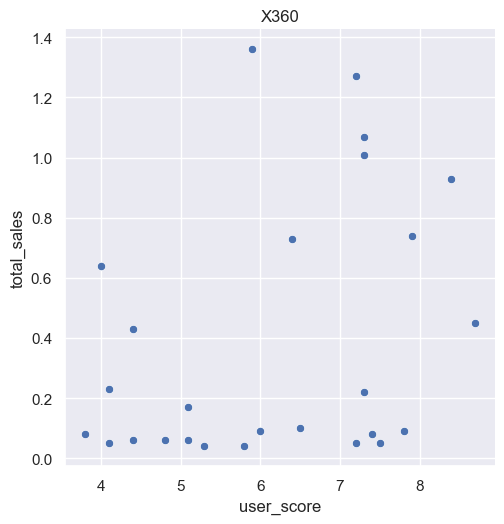

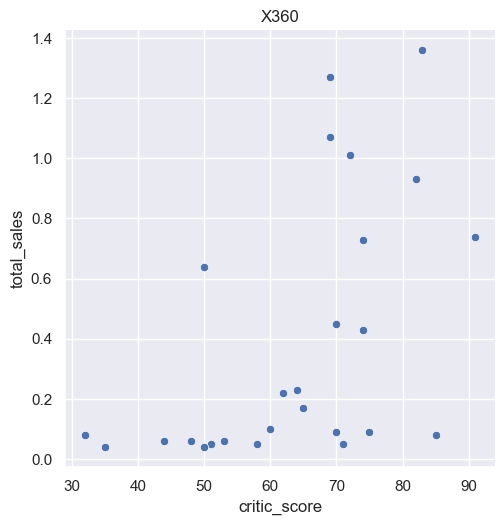

In [67]:
# напишем цикл, в котором будет производиться расчет коэф-та корреляции 
# для отзывов пользователей и критиков относительно объема продаж
# и будут строиться диаграммы корреляций
for platform in ['PS3', 'XOne', '3DS', 'X360']:
    # выведем название платформы
    print('\n{0}:'.format(platform)) 
    # цикл для каждой платформы из списка
    for column in ['user_score', 'critic_score']:
        # выделим данные для платформы
        platform_tmp = actual_data.query('platform == @platform and (critic_score != -1)')
        # Выведем значения коэф-та корреляции для каждой платформы
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(platform_tmp[column].corr(platform_tmp['total_sales']), 2)))
        # построим диаграмму корреляции
        sns.relplot(x=column, y="total_sales", data=platform_tmp) 
        _ = plt.title(platform)

Выводы, сделанные в предыдущем пункте подтверждаются: отзывы критиков напрямую влияют на продажи, отзывы пользователей - не влияют.

### Распределение игр по жанрам

Сгруппируем данные кол-ву игр в каждом жанре и по общим продажам игр каждого жанра.

In [68]:
genres_games = actual_data.groupby('genre')['name'].count().sort_values(ascending=False)
genres_games

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

In [69]:
genres_sales = actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genres_sales

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Построим круговые диаграммы полученных данных

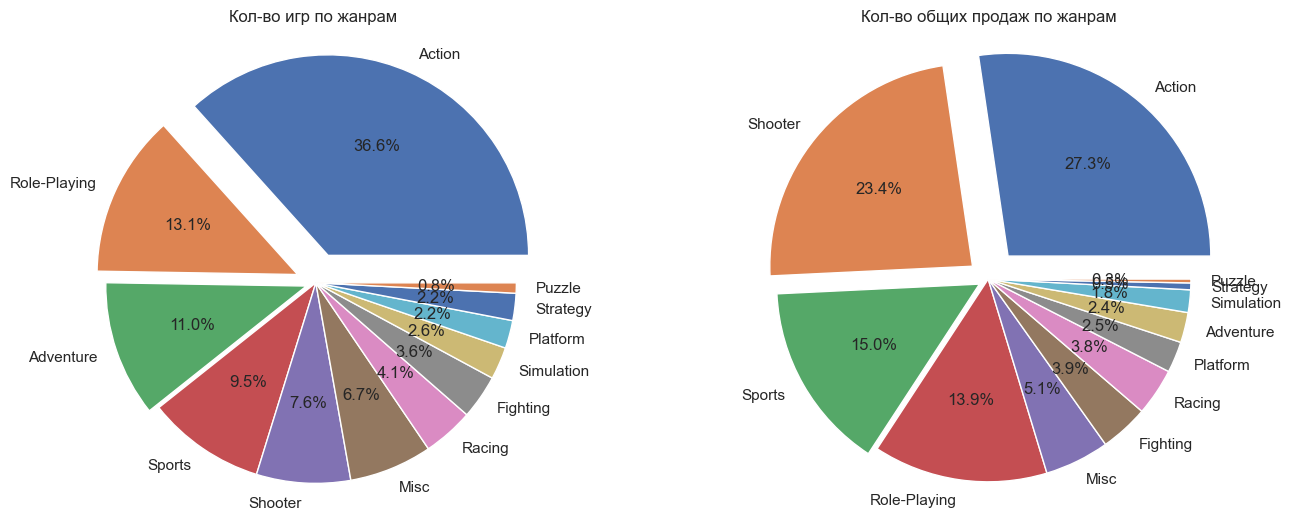

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate();

# Круговая диаграмма, где срезы будут упорядочены и построены против часовой стрелки
labels1 = genres_games.index
sizes1 = genres_games.values

labels2 = genres_sales.index
sizes2 = genres_sales.values

# выделим 3 самых популярных жанра от общего круга
explode = (0.15, 0.1, 0.05, 0,0,0,0,0,0,0,0,0) 

# строим круг кол-ва игр по жанрам
ax1.set_title('Кол-во игр по жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=False, explode=explode,startangle=0)  
ax1.axis('equal')  # Равное соотношение сторон

# строим круг по продажам по жанрам
ax2.set_title('Кол-во общих продаж по жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=False, explode=explode,startangle=0) 
ax2.axis('equal') # Равное соотношение сторон

plt.show()

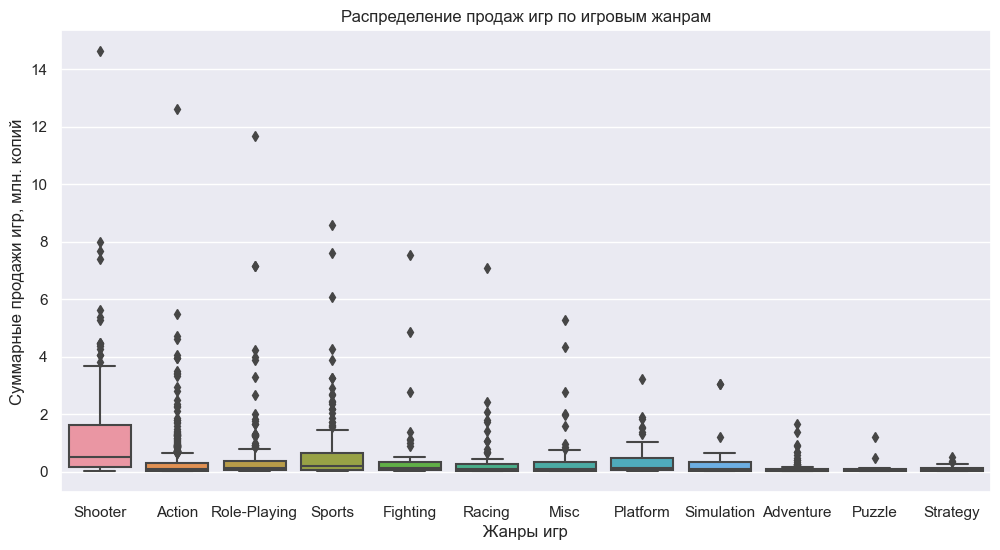

In [71]:
# Построим "ящик с усами" по глобальным продажам игр в разбивке по жанрам
# в 100% масштабе
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='genre', y='total_sales', data=actual_data)
ax.set_ylabel('Суммарные продажи игр, млн. копий')
ax.set_xlabel('Жанры игр')
ax.set_title('Распределение продаж игр по игровым жанрам')
plt.show()

Виден выброс продаж в жанрах Shooter, Action и Role-Playing - более 10 млн.копий. Построим приближенную диаграмму размаха

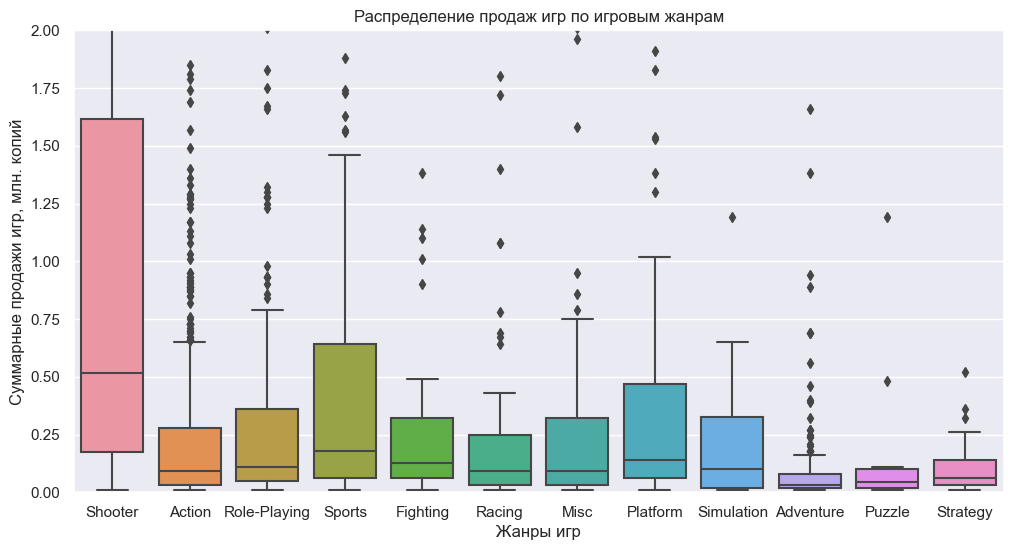

In [72]:
# Построим "ящик с усами" по глобальным продажам игр в разбивке по жанрам
# в приближенном масштабе
plt.figure(figsize=(12,6))

ax = sns.boxplot(x='genre', y='total_sales', data=actual_data)
ax.set_ylim(0, 2)
ax.set_ylabel('Суммарные продажи игр, млн. копий')
ax.set_xlabel('Жанры игр')
ax.set_title('Распределение продаж игр по игровым жанрам')
plt.show()

Как видим наибольшие медианные продажи в жанре **Shooter** (около 0,5 млн.копий), далее по популярности идут жанры **Sports** и **Platform**.  

Продажи жанра **Action** хоть и составляют самый большой процент, но являются нестабильными с большим количеством выбросов в продажах.

**Выводы**  
В разделе исследовательского анализа данных была проведена следующая работа:
* просмотрено кол-во выпущенных игр на различных платформах по годам;
* проанализированы продажи игр в каждой платформе;
* определен актуальный период анализа данных для прогноза на 2017 год - *2014-2016 гг.*;
* выбрали потенциально выгодные платформы на текущий момент - **PS4**, **Xone**, **3DS**;
* оценили влияние оценок пользователей и критиков на продажи игр - *оценки критиков влияют напрямую на продажи, а оценки пользователей - нет*;
* определили самые продаваемые жанры в играх - **Shooter**, **Sports** и **Platform**.

## Составление портрета пользователя каждого региона

### Самые популярные платформы в каждом регионе  

Сначала определим для пользователей каждого региона (NA, EU, JP) самые популярные платформы.

In [73]:
# Создадим сводную таблицу самых популярных платформ
pivot = actual_data.groupby('platform').\
    agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}).\
    sort_values(by='na_sales', ascending=False).reset_index()
    
pivot

,platform,na_sales,eu_sales,jp_sales
0,PS4,98.61,130.04,15.02
1,XOne,81.27,46.25,0.32
2,X360,28.30,15.49,0.08
3,3DS,22.64,16.12,44.24
4,PS3,22.05,25.54,11.22
5,WiiU,19.36,13.15,7.31
6,PC,7.23,17.97,0.00
7,PSV,2.52,3.53,14.54
8,Wii,2.08,2.59,0.00
9,PSP,0.00,0.00,0.36


Как видим - в разных регионах разные самые популярные платформы. Сформируем отдельные таблицы топ-5 платформ для каждого региона, объединим оставшиеся в категорию Other.

In [74]:
# Сводная для Северной Америки
pivot_na = actual_data.groupby('platform').\
    agg({'na_sales': 'sum'}).\
    sort_values(by='na_sales', ascending=False).reset_index()
pivot_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


In [75]:
# топ-5 Северной Америки
pivot_na = pivot_na.append({'platform': 'Other', 'na_sales': pivot_na['na_sales'][5:10].sum(axis=0)}, ignore_index=True).\
    drop(labels=[5,6,7,8,9], axis=0).reset_index(drop=True)
pivot_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Other,31.19


In [76]:
# сводная для Европы
pivot_eu = actual_data.groupby('platform').\
    agg({'eu_sales': 'sum'}).\
    sort_values(by='eu_sales', ascending=False).reset_index()
pivot_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


In [77]:
# топ-5 Европы
pivot_eu = pivot_eu.append({'platform': 'Other', 'eu_sales': pivot_eu['eu_sales'][5:10].sum(axis=0)}, ignore_index=True).\
    drop(labels=[5,6,7,8,9], axis=0).reset_index(drop=True)
pivot_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Other,34.76


In [78]:
# сводная для Японии
pivot_jp = actual_data.groupby('platform').\
    agg({'jp_sales': 'sum'}).\
    sort_values(by='jp_sales', ascending=False).reset_index()
pivot_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


In [79]:
# топ-5 Японии
pivot_jp = pivot_jp.append({'platform': 'Other', 'jp_sales': pivot_jp['jp_sales'][5:10].sum(axis=0)}, ignore_index=True).\
    drop(labels=[5,6,7,8,9], axis=0).reset_index(drop=True)
pivot_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Other,0.76


Построим круговые диаграммы для продаж игр на самых популярных платформах в каждом регионе в определенном оптимальном периоде для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные. Напишем функцию для построения диаграмм

In [80]:
def graph (df, year, region, name, axes):
    '''
    Строит круговые диаграммы популярных платформ
    '''
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
        
    sales.columns = ['platform', 'sales']
      
    # Зададим цветовую гамму     
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
               'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

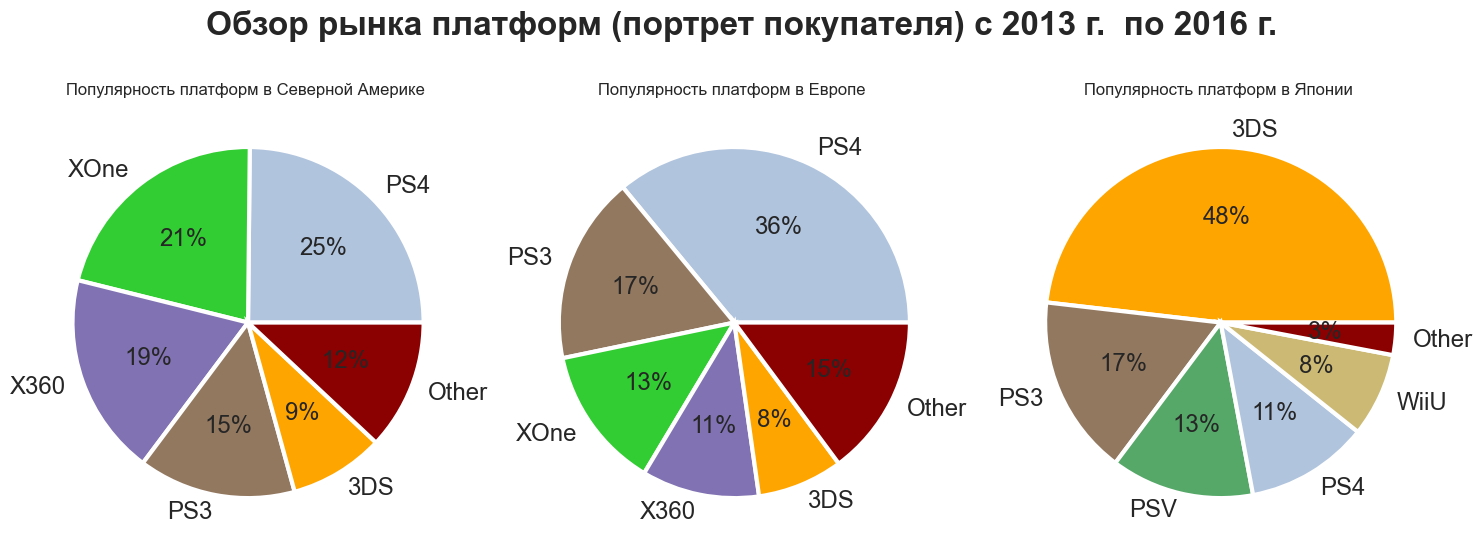

In [81]:
# Построим круговые диаграммы в ряд
x_year = 2013

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(df, x_year,'eu_sales', 'Европе', axes[1])
graph(df, x_year, 'jp_sales', 'Японии', axes[2])

Дополнительно возьмем периоды с 2014г. по 2016г., а также с 2015г. по 2016г. для акцентирования на изменении доли в продажах современных платформ

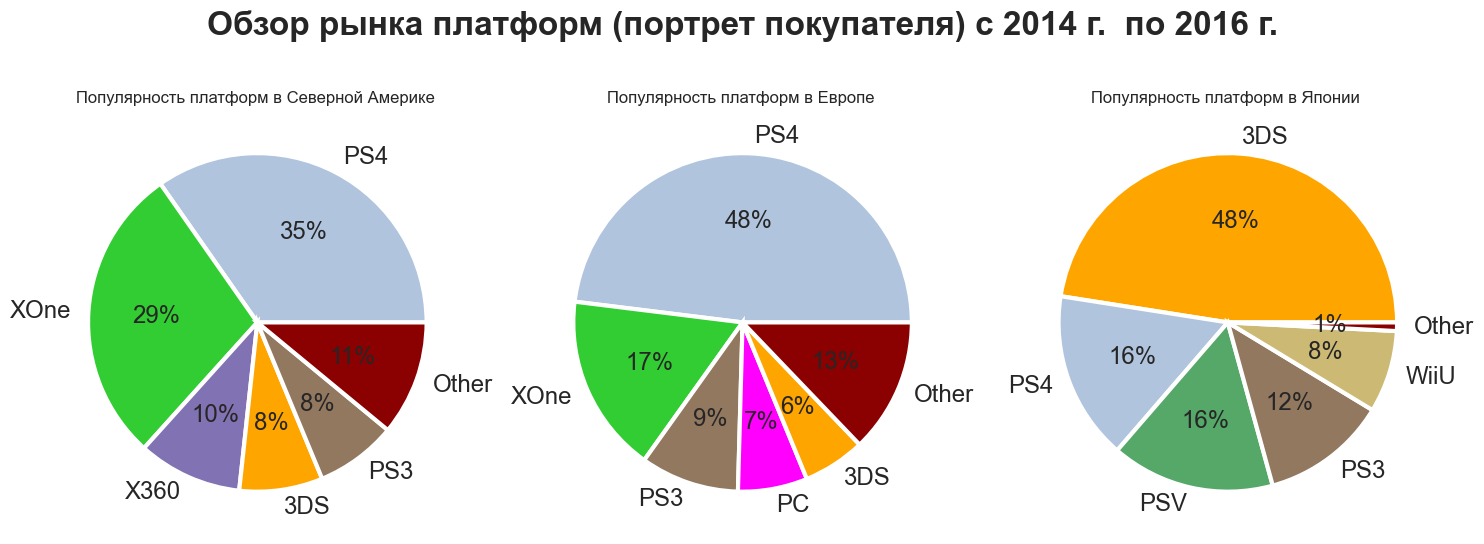

In [82]:
x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(df, x_year,'eu_sales', 'Европе', axes[1])
graph(df, x_year, 'jp_sales', 'Японии', axes[2])

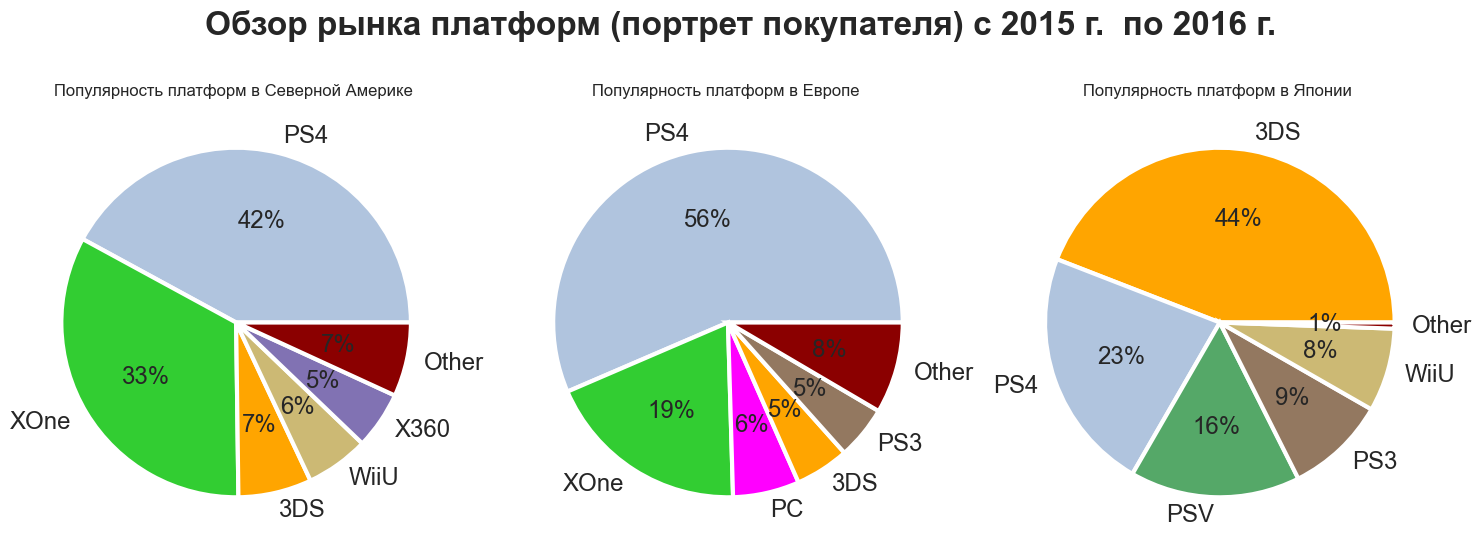

In [83]:
x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(df, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(df, x_year,'eu_sales', 'Европе', axes[1])
graph(df, x_year, 'jp_sales', 'Японии', axes[2])

В Северной Америке и Европе лидерами по продажам являются игры, выпускаемые на PS4 и XOne;  
в Японии - явный лидер 3DS, далее примерно одинаково продаются игры на PS4 и PSV.  

Стоит отметить, что рынок Японии резко отличается от рынка Северной Америки и Европы, там в основном успех имеют именно платформы японского производства.

### Самые популярные жанры в каждом регионе  

Теперь по аналогии определим для пользователей каждого региона (NA, EU, JP) самые популярные жанры игр.

In [84]:
# создадим словарь с данными по продажам топ-5 жанров в каждом регионе
top_genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genre_dict[region] = actual_data.groupby('genre')[region].sum().sort_values(ascending=False).head()

top_genre_dict

{'na_sales': genre
 Shooter         79.02
 Action          72.53
 Sports          46.13
 Role-Playing    33.47
 Misc            15.05
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          74.68
 Shooter         65.52
 Sports          45.73
 Role-Playing    28.17
 Racing          14.13
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    31.16
 Action          29.58
 Fighting         6.37
 Misc             5.61
 Shooter          4.87
 Name: jp_sales, dtype: float64}

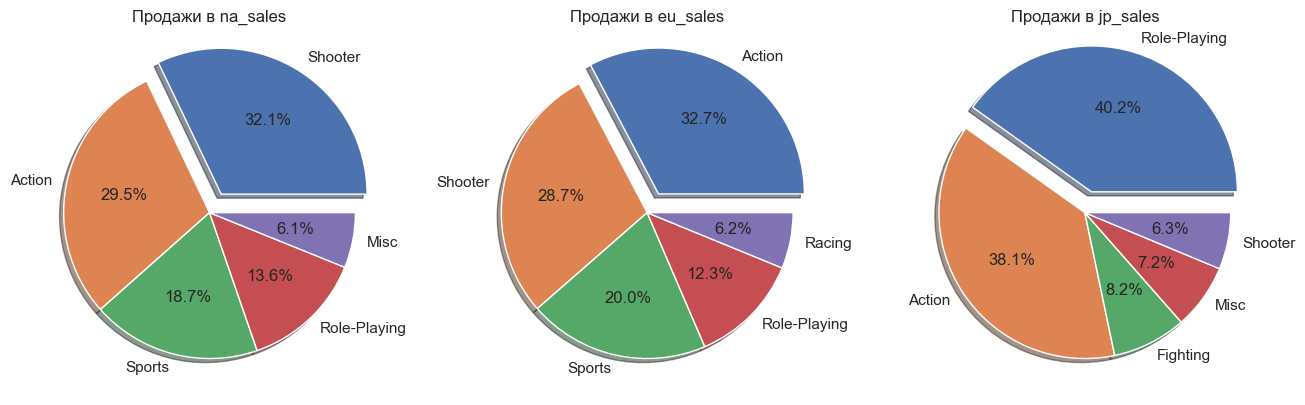

In [85]:
# построим круговые диаграммы продаж игр самых популярных жанров в каждом регионе

# зададим параметры графика
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
fig.autofmt_xdate()

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
# выделим самую популярную платформу относительно остального круга
explode = (0.15, 0, 0, 0, 0)

for i in [0, 1, 2]:
    labels = top_genre_dict[region[i]].index
    sizes = top_genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}') # добавим название графика
    ax.pie(sizes, 
           labels=labels,
          autopct='%1.1f%%', # отформатируем до 1  знака после запятой
          shadow=True, #добавим тень
          explode=explode)
    
plt.show()

На рынке Северной Америки самым популярным жанром является **Shooter**. 
В Европе самый популярный жанр - **Action**.
В Японии самый популярный жанр - **Role-Playing**.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Сформируем данные продаж в каждом регионе всех возрастных рейтингов

In [86]:
esrb_sales = actual_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().\
    sort_values(by='na_sales', ascending=False).reset_index()

esrb_sales

,rating,na_sales,eu_sales,jp_sales
0,M,103.44,100.99,8.55
1,unrated,54.97,48.53,54.51
2,E,50.76,58.27,8.98
3,T,40.28,35.33,16.28
4,E10+,34.61,27.56,4.77


Видно, что наибольшие продажи в Северной Америке и Европе приносят игры для взрослых (**M**). В Японии это игры без рейтинга - **unrated**, которые также составляют существенную долю продаж в других регионах.

## Проверка гипотез

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, потому что в обоих случаях выборки данных независимы между собой. Пороговое значение alpha определим равным 0.05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Перед проверкой гипотезы построим сводную таблицу и оценим распределение пользовательский оценок

In [87]:
# Создадим сводную таблицу
user_score_platform = actual_data.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score').round(2)

user_score_platform

,user_score
platform,
PC,4.9
XOne,4.5


In [88]:
# создадим вспомогательные переменные
xone = df.query('platform == "XOne" and user_score != -1').user_score.dropna().reset_index(drop=True)
pc = df.query('platform == "PC" and user_score != -1 and year_of_release >= 2013').user_score.dropna().reset_index(drop=True)

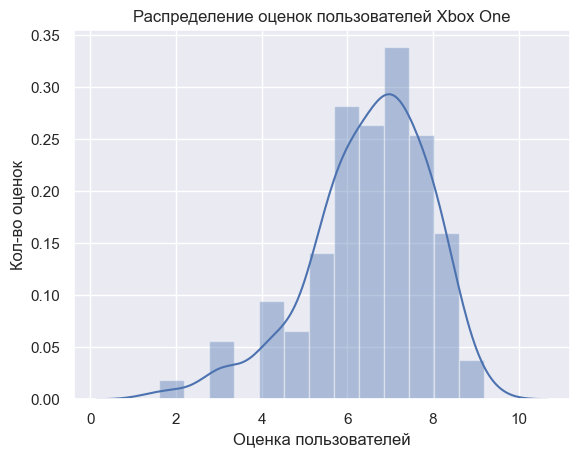

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [89]:
# Построим график распределений 
plt.title('Распределение оценок пользователей Xbox One')
sns.distplot(xone)
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во оценок')
plt.show()

# выведем описание
xone.describe()

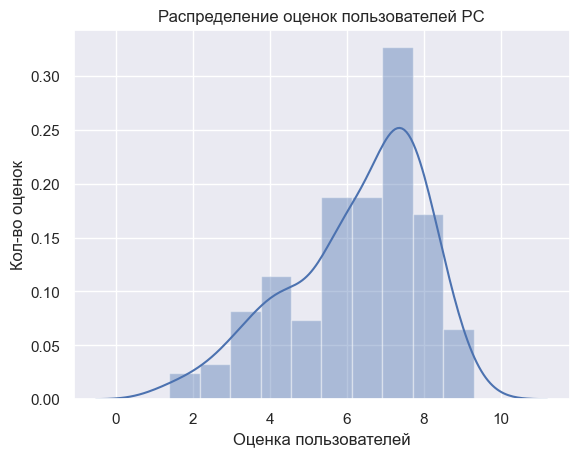

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [90]:
# Построим график распределений 
plt.title('Распределение оценок пользователей PC')
sns.distplot(pc)
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во оценок')
plt.show()

# выведем описание
pc.describe()

Предварительно, глядя на графики можно сказать, что оценки незначительно различаются.

Введем нулевую и альтернативную гипотезы:
* **Н0** - средние пользовательские рейтинги платформ Xbox One и PC равны
* **Н1** - средние пользовательские рейтинги платформ Xbox One и PC различны

Уровень значимости: **alpha = 0.05**

Значение p-value будем считать, используя метод `ttest` из библиотеки `scipy` для сравнения средних двух выборок.  

Т.к. выяснили, что размеры выборок отличаются, то для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей будем использовать метод `ttest_ind`. Равнозначность выборок сомнительно, поэтому примем параметр `equal_val=False`.

Значение p-value меньше alpha будет означать, что нулевую гипотезу о равенстве средний нужно будет отвергнуть.

In [91]:
# критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)
# тест двухсторонний
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Предварительные выводы по графикам опровергнуть не получилось: пользовательские рейтинги платформ Xbox One и PC примерно равны.  
Если бы мы утверждали, что пользовательские рейтинги платформ Xbox One и PC отличаются, то получили бы ошибку почти в **15%** случаев.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Проверку гипотезы будем проводить по аналогии с проверкой первой гипотезы.

In [92]:
# Создадим сводную таблицу
user_score_genre = actual_data.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score').round(2)

user_score_genre

,user_score
genre,
Action,2.72
Sports,3.91


In [93]:
# создадим вспомогательные переменные
action = actual_data.query('genre == "Action" and user_score != -1').user_score.dropna().reset_index(drop=True)
sports = actual_data.query('genre == "Sports" and user_score != -1').user_score.dropna().reset_index(drop=True)

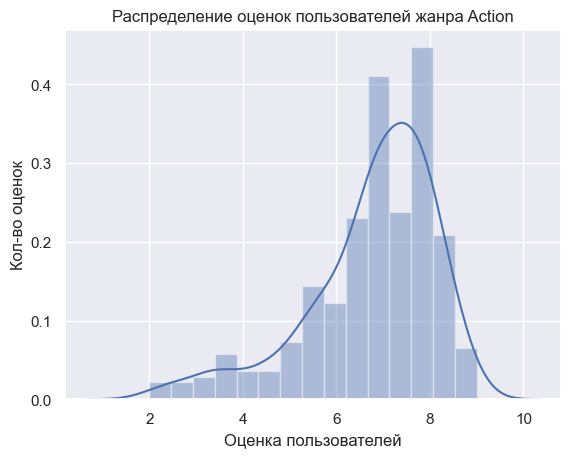

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [94]:
# Построим график распределений 
plt.title('Распределение оценок пользователей жанра Action')
sns.distplot(action)
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во оценок')
plt.show()

# выведем описание
action.describe()

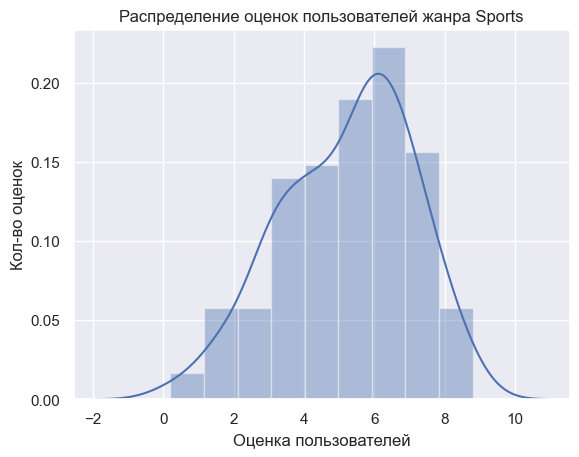

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [95]:
# Построим график распределений 
plt.title('Распределение оценок пользователей жанра Sports')
sns.distplot(sports)
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во оценок')
plt.show()

# выведем описание
sports.describe()

Оценок пользователей жанра Action почти в 2,5 раза больше, чем оценок жанра Sports. Предварительно по графикам можно сказать, что оценки обоих жанров различаются.

Введем нулевую и альтернативную гипотезы:
* **Н0** - средние пользовательские рейтинги жанров Action и Sports равны
* **Н1** - средние пользовательские рейтинги жанров Action и Sports различны

Уровень значимости: **alpha = 0.05**

Значение p-value будем считать, используя метод `ttest` из библиотеки `scipy` для сравнения средних двух выборок.  

Т.к. выяснили, что размеры выборок отличаются, то для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей будем использовать метод `ttest_ind`. Равнозначность выборок сомнительно, поэтому примем параметр `equal_val=False`.

Значение p-value меньше alpha будет означать, что нулевую гипотезу о равенстве средний нужно будет отвергнуть.

In [96]:
# критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)
# тест двухсторонний
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью почти 99,9% (т.е. почти всегда) средние оценки пользователей жанров Action и Sports - будут отличаться. При выборе между продвижением игр из этих двух жанров, при прочих равных условиях лучше отдать предпочтение жанру Sports.

## Общий вывод

В ходе исследования определили зависимости, влияющие на количество проданных копий игр и получили следующие результаты:
* посчитали, что в среднем платформа существует около 7 лет;
* определили самые популярные жанры в разрезе суммарных продаж среди всех пользователей: для Северной Америки это **Shooter**, для Европы - **Action**, для Японии - **Role-Playing**;
* выяснили, что на продажи игр оценки критиков влияют, а оценки пользователей - нет;
* определили на игра каких платформ стоит делать акцент при прогнозе продаж на 2017 год - **PS4**, **XOne**, **3DS**;
* определили самые популярные платформы и жанры по разным регионам. Тем самым составили портрет пользователя каждого региона;
* вяснили, что самые продаваемые игры в категории возрастный ограничений с рейтингом ESRB - **E** (для взрослых), а также игры **без рейтинга**;
* проверили гипотезы, что пользовательские оценки платформ Xbox One и PC совпадают, а в жанрах Action и Sports - отличаются.

**Рекомендации интернет-магазину по продаже компьютерных игр:**  
* при прогнозе продаж на 2017 год необходимо учитывать игры только актуальных платформ и делать акцент на более новых платформах;
* учитывать, что рынок Японии значительно отличается от Европейского и Североамериканского;
* стоит учесть, что даже у самых перспективных платформ продажи с каждым годом становятся все меньше и меньше, что говорит об общем падении рынка игровой индустрии.